In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
# Import train and test split
from sklearn.model_selection import train_test_split

# Improt preprocessing module
from sklearn import preprocessing

# Import Random Forest
from sklearn.ensemble import RandomForestRegressor

# Import cross-validation tools
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Import metrics for model performance
from sklearn.metrics import mean_squared_error, r2_score

# Import module for storing arrays
import joblib

from sklearn.neighbors import KNeighborsClassifier

***

## Step 3: Load Dataset from file in Repository

<br>

In [26]:
data_1 = pd.read_csv('titanic.csv')

In [27]:
print(data_1.head())

   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  


In [28]:
print(data_1.shape)

(887, 8)


In [29]:
data_1

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


***

### Remove Semicolons from the data

<br>

In [30]:
data_2 = data_1

#print(data_2.head)

***

### Check out the shape and summary statistics of the data

<br>

In [31]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
print(data_2.shape)

(1599, 12)


***

## Create groups of 'quantity' values as either 'bad' or good'

## Import Dataset

In [100]:
data_2 = pd.read_csv('titanic.csv')


In [39]:
data_2

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


## Assumption 1: Dependent Variable

### Dependent: Age

In [120]:
dependent_Age = data_2['Age']

### Dependent: Fare

In [121]:
dependent_Fare = data_2['Fare']

## Assumption 2: Independent Variable

### 1: Survived

In [122]:
independent_Survived = data_2['Survived']

### 2: Pclass

In [123]:
independent_Pclass = data_2['Pclass']

### Number 3: Siblings/Spouses

In [124]:
independent_SibSpouse = data_2['Siblings/Spouses Aboard']

## Assumption 4: Outliers

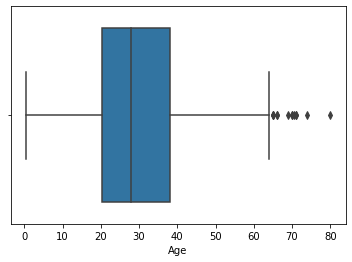

In [128]:
sns.boxplot(independent_Age)

In [107]:
independent_Age.describe()

count    887.000000
mean      29.471443
std       14.121908
min        0.420000
25%       20.250000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [97]:
pd.set_option('display.max_rows', 10000)

In [101]:
data_view = data_2

In [102]:
data_view.orderby('Fare')

AttributeError: 'DataFrame' object has no attribute 'orderby'

In [129]:
data_view.sort_values(by='Age')

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
799,1,3,Master. Assad Alexander Thomas,male,0.42,0,1,8.5167
751,1,2,Master. Viljo Hamalainen,male,0.67,1,1,14.5000
641,1,3,Miss. Eugenie Baclini,female,0.75,2,1,19.2583
466,1,3,Miss. Helene Barbara Baclini,female,0.75,2,1,19.2583
827,1,2,Master. George Sibley Richards,male,0.83,1,1,18.7500
77,1,2,Master. Alden Gates Caldwell,male,0.83,0,2,29.0000
303,1,1,Master. Hudson Trevor Allison,male,0.92,1,2,151.5500
823,1,2,Master. Andre Mallet,male,1.00,0,2,37.0042
171,1,3,Miss. Eleanor Ileen Johnson,female,1.00,1,1,11.1333
379,1,3,Miss. Maria Nakid,female,1.00,0,2,15.7417
